In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('training.csv')

# Data Preprocessing

In [ ]:
df.shape

(12906, 83)

In [ ]:
df.dtypes

patient_id          int64
patient_race       object
payer_type         object
patient_state      object
patient_zip3        int64
                   ...   
veteran           float64
Ozone             float64
PM25              float64
N02               float64
DiagPeriodL90D      int64
Length: 83, dtype: object

In [ ]:
df.head()

patient_id patient_race  payer_type patient_state  patient_zip3  \
0      475714          NaN    MEDICAID            CA           924   
1      349367        White  COMMERCIAL            CA           928   
2      138632        White  COMMERCIAL            TX           760   
3      617843        White  COMMERCIAL            CA           926   
4      817482          NaN  COMMERCIAL            ID           836   

   patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0           84              F    NaN                       C50919   
1           62              F  28.49                       C50411   
2           43              F  38.09                       C50112   
3           45              F    NaN                       C50212   
4           55              F    NaN                         1749   

                        breast_cancer_diagnosis_desc  ...   disabled  \
0  Malignant neoplasm of unsp site of unspecified...  ...  12.871429   
1  Malig neoplm of upper-outer quadrant of right ...  ...   8.957576   
2  Malignant neoplasm of central portion of left ...  ...  11.253333   
3  Malig neoplasm of upper-inner quadrant of left...  ...   8.845238   
4  Malignant neoplasm of breast (female), unspeci...  ...  15.276000   

     poverty limited_english commute_time health_uninsured    veteran  \
0  22.542857       10.100000    27.814286        11.200000   3.500000   
1  10.109091        8.057576    30.606061         7.018182   4.103030   
2   9.663333        3.356667    31.394915        15.066667   7.446667   
3   8.688095        5.280952    27.561905         4.404762   4.809524   
4  11.224000        1.946000    26.170213        12.088000  13.106000   

       Ozone      PM25        N02  DiagPeriodL90D  
0  52.237210  8.650555  18.606528               1  
1  42.301121  8.487175  20.113179               1  
2  40.108207  7.642753  14.839351               1  
3  42.070075  7.229393  15.894123               0  
4  41.356058  4.110749  11.722197               0  

[5 rows x 83 columns]

In [ ]:
df.describe()

patient_id  patient_zip3   patient_age          bmi    population  \
count   12906.000000  12906.000000  12906.000000  3941.000000  12905.000000   
mean   547381.196033    573.754300     59.183326    28.984539  20744.441237   
std    260404.959974    275.447534     13.335216     5.696906  13886.903756   
min    100063.000000    101.000000     18.000000    14.000000    635.545455   
25%    321517.000000    331.000000     50.000000    24.660000   9463.896552   
50%    543522.000000    554.000000     59.000000    28.190000  19154.190480   
75%    772671.750000    846.000000     67.000000    32.920000  30021.278690   
max    999896.000000    999.000000     91.000000    85.000000  71374.131580   

            density    age_median  age_under_10  age_10_to_19       age_20s  \
count  12905.000000  12905.000000  12905.000000  12905.000000  12905.000000   
mean    1581.950419     40.502259     11.122784     12.945265     13.290376   
std     2966.305306      4.036963      1.512376      1.923974      3.354103   
min        0.916667     20.600000      0.000000      6.314286      5.925000   
25%      171.857143     37.129825     10.160000     11.741176     11.013415   
50%      700.337500     40.639344     11.039216     12.923944     12.538095   
75%     1666.515385     42.934783     12.190000     14.019767     14.971053   
max    21172.000000     54.570000     17.675000     35.300000     62.100000   

       ...      disabled       poverty  limited_english  commute_time  \
count  ...  12905.000000  12902.000000     12902.000000  12905.000000   
mean   ...     13.335299     13.406950         4.474956     27.978387   
std    ...      3.690949      5.222495         4.837085      5.083939   
min    ...      4.600000      3.433333         0.000000     12.460784   
25%    ...     10.270492      9.663333         0.994444     24.933333   
50%    ...     12.884000     12.177778         2.747222     27.788235   
75%    ...     15.555405     16.635556         5.976000     30.709375   
max    ...     35.155556     38.347826        26.755000     48.020000   

       health_uninsured       veteran         Ozone          PM25  \
count      12905.000000  12905.000000  12877.000000  12877.000000   
mean           8.575284      7.083376     39.822352      7.475221   
std            4.203482      3.109022      3.559492      1.516499   
min            2.440000      1.200000     30.939316      2.636008   
25%            5.618750      4.929688     37.698880      6.651215   
50%            7.465714      6.847059     39.108249      7.686577   
75%           10.617442      8.620000     41.136513      8.276922   
max           27.566102     25.200000     52.237210     11.169408   

                N02  DiagPeriodL90D  
count  12877.000000    12906.000000  
mean      16.098988        0.624516  
std        5.842501        0.484266  
min        2.760371        0.000000  
25%       11.280694        0.000000  
50%       15.589148        1.000000  
75%       20.801880        1.000000  
max       31.504775        1.000000  

[8 rows x 72 columns]

In [ ]:
### Checking for the uniques variables in the categorical dataset
cat_col= df.select_dtypes(include=['object', 'category']).columns

for col in cat_col:
    unique_var = df[col].unique()
    print(f"Unique variable for {col}: {unique_var}")

Unique variable for patient_race: [nan 'White' 'Other' 'Hispanic' 'Asian' 'Black']
Unique variable for payer_type: ['MEDICAID' 'COMMERCIAL' 'MEDICARE ADVANTAGE' nan]
Unique variable for patient_state: ['CA' 'TX' 'ID' 'NY' 'IL' nan 'MI' 'OR' 'MT' 'KY' 'OH' 'IN' 'FL' 'CO' 'GA'
 'VA' 'MD' 'KS' 'WI' 'PA' 'NM' 'WA' 'MN' 'NC' 'AL' 'SC' 'LA' 'IA' 'TN'
 'HI' 'NE' 'AZ' 'MO' 'NV' 'SD' 'DC' 'AR' 'UT' 'WV' 'ND' 'OK' 'WY' 'DE'
 'NJ' 'MS' 'AK' 'PR' 'RI' 'CT' 'NH' 'MA']
Unique variable for patient_gender: ['F']
Unique variable for breast_cancer_diagnosis_code: ['C50919' 'C50411' 'C50112' 'C50212' '1749' 'C50912' 'C50512' '1744'
 'C50412' 'C50812' 'C50911' 'C50312' 'C50311' 'C50111' '1741' 'C5091'
 'C50811' '1748' 'C50511' '1743' 'C50211' 'C50011' 'C5051' 'C50012'
 'C50419' '1742' 'C50611' 'C50612' 'C50119' 'C50819' '1746' 'C5041'
 'C50619' '19881' 'C5081' '1745' 'C50219' 'C50319' 'C50019' 'C50519'
 'C50929' 'C50021' 'C5021' 'C5011' 'C5031' 'C509' 'C50' '1759' 'C5001'
 'C50421']
Unique variable for br

In [ ]:
### Checking for the missing values in the data
misssing_data = df.isnull().sum()
print("Missing data: \n ", misssing_data)

Missing data: 
  patient_id           0
patient_race      6385
payer_type        1803
patient_state       51
patient_zip3         0
                  ... 
veteran              1
Ozone               29
PM25                29
N02                 29
DiagPeriodL90D       0
Length: 83, dtype: int64


In [ ]:
### Handling the missing numerical and categrorical data
# Numerical data- median imputation
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].median())
### Handling the missing categorical data using mode imputation
for col in df.select_dtypes(include=['object']).columns:
    df[col] =df[col].fillna(df[col].mode()[0])

In [ ]:
### Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           12906 non-null  object 
 2   payer_type                             12906 non-null  object 
 3   patient_state                          12906 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    12906 non-null  float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

In [ ]:
### Checking for duplicate
duplicates = df.duplicated().sum()
print("Number of Duplicate:\n", duplicates)

Number of Duplicate:
 0


In [ ]:
### Checking for Invalid entries for
invalid_entries = df[df.select_dtypes(include=['number'])<0].count()
print("Invalid Entries: \n", invalid_entries)

Invalid Entries: 
 patient_id        0
patient_race      0
payer_type        0
patient_state     0
patient_zip3      0
                 ..
veteran           0
Ozone             0
PM25              0
N02               0
DiagPeriodL90D    0
Length: 83, dtype: int64


In [ ]:
### Correlation Matrix
num_col = df.select_dtypes(include=np.number).columns
correlation_matrix = df[num_col].corr()
correlation_matrix

patient_id  patient_zip3  patient_age       bmi  population  \
patient_id        1.000000      0.020582     0.008109 -0.003337    0.001227   
patient_zip3      0.020582      1.000000    -0.062820 -0.025671    0.098974   
patient_age       0.008109     -0.062820     1.000000 -0.034802   -0.018034   
bmi              -0.003337     -0.025671    -0.034802  1.000000   -0.016984   
population        0.001227      0.098974    -0.018034 -0.016984    1.000000   
...                    ...           ...          ...       ...         ...   
veteran          -0.004940      0.038641     0.002477  0.016266   -0.500772   
Ozone            -0.007319      0.389640    -0.025823 -0.011100    0.081526   
PM25              0.011330     -0.066421    -0.023035  0.002564    0.385093   
N02               0.004651     -0.073817     0.014863 -0.020251    0.672276   
DiagPeriodL90D    0.002405      0.036372     0.055634 -0.009052   -0.006564   

                 density  age_median  age_under_10  age_10_to_19   age_20s  \
patient_id     -0.007391    0.005048     -0.004158     -0.018010 -0.003950   
patient_zip3   -0.196645   -0.148137      0.057009      0.032373  0.095152   
patient_age    -0.002501    0.040115     -0.026525     -0.029744 -0.020594   
bmi            -0.002892   -0.014548      0.033054      0.006663  0.002973   
population      0.730978   -0.550534      0.254734      0.000770  0.437071   
...                  ...         ...           ...           ...       ...   
veteran        -0.490775    0.346022     -0.169988     -0.077042 -0.115528   
Ozone          -0.124889   -0.053309     -0.036422      0.068285  0.058885   
PM25            0.199229   -0.462487      0.263498      0.201455  0.317203   
N02             0.578586   -0.486529      0.176122     -0.014526  0.410497   
DiagPeriodL90D -0.017256   -0.000408     -0.008980     -0.015170  0.003455   

                ...  disabled   poverty  limited_english  commute_time  \
patient_id      ...  0.008590  0.011715         0.015854      0.002057   
patient_zip3    ... -0.122074 -0.043869         0.204556     -0.158597   
patient_age     ...  0.015372  0.000199        -0.028139     -0.034830   
bmi             ...  0.042888  0.036464        -0.011799     -0.022574   
population      ... -0.533188  0.102812         0.671432      0.471734   
...             ...       ...       ...              ...           ...   
veteran         ...  0.408566 -0.099291        -0.493024     -0.373883   
Ozone           ... -0.004765  0.011108         0.061081     -0.014967   
PM25            ... -0.217214  0.198929         0.331380      0.137092   
N02             ... -0.531627  0.002540         0.427383      0.338445   
DiagPeriodL90D  ... -0.020363 -0.024755        -0.011355     -0.027370   

                health_uninsured   veteran     Ozone      PM25       N02  \
patient_id              0.017466 -0.004940 -0.007319  0.011330  0.004651   
patient_zip3            0.139950  0.038641  0.389640 -0.066421 -0.073817   
patient_age            -0.036234  0.002477 -0.025823 -0.023035  0.014863   
bmi                     0.036598  0.016266 -0.011100  0.002564 -0.020251   
population              0.057858 -0.500772  0.081526  0.385093  0.672276   
...                          ...       ...       ...       ...       ...   
veteran                 0.080999  1.000000  0.120174 -0.403779 -0.475722   
Ozone                  -0.029134  0.120174  1.000000 -0.136977  0.055731   
PM25                    0.222166 -0.403779 -0.136977  1.000000  0.285006   
N02                    -0.173699 -0.475722  0.055731  0.285006  1.000000   
DiagPeriodL90D         -0.028537 -0.001023  0.007877 -0.016483  0.000763   

                DiagPeriodL90D  
patient_id            0.002405  
patient_zip3          0.036372  
patient_age           0.055634  
bmi                  -0.009052  
population           -0.006564  
...                        ...  
veteran              -0.001023  
Ozone                 0.007877  
PM25                 -0.016483 

In [ ]:
### Dropping the id column
df_0 = df.drop(["patient_id"], axis= 1)

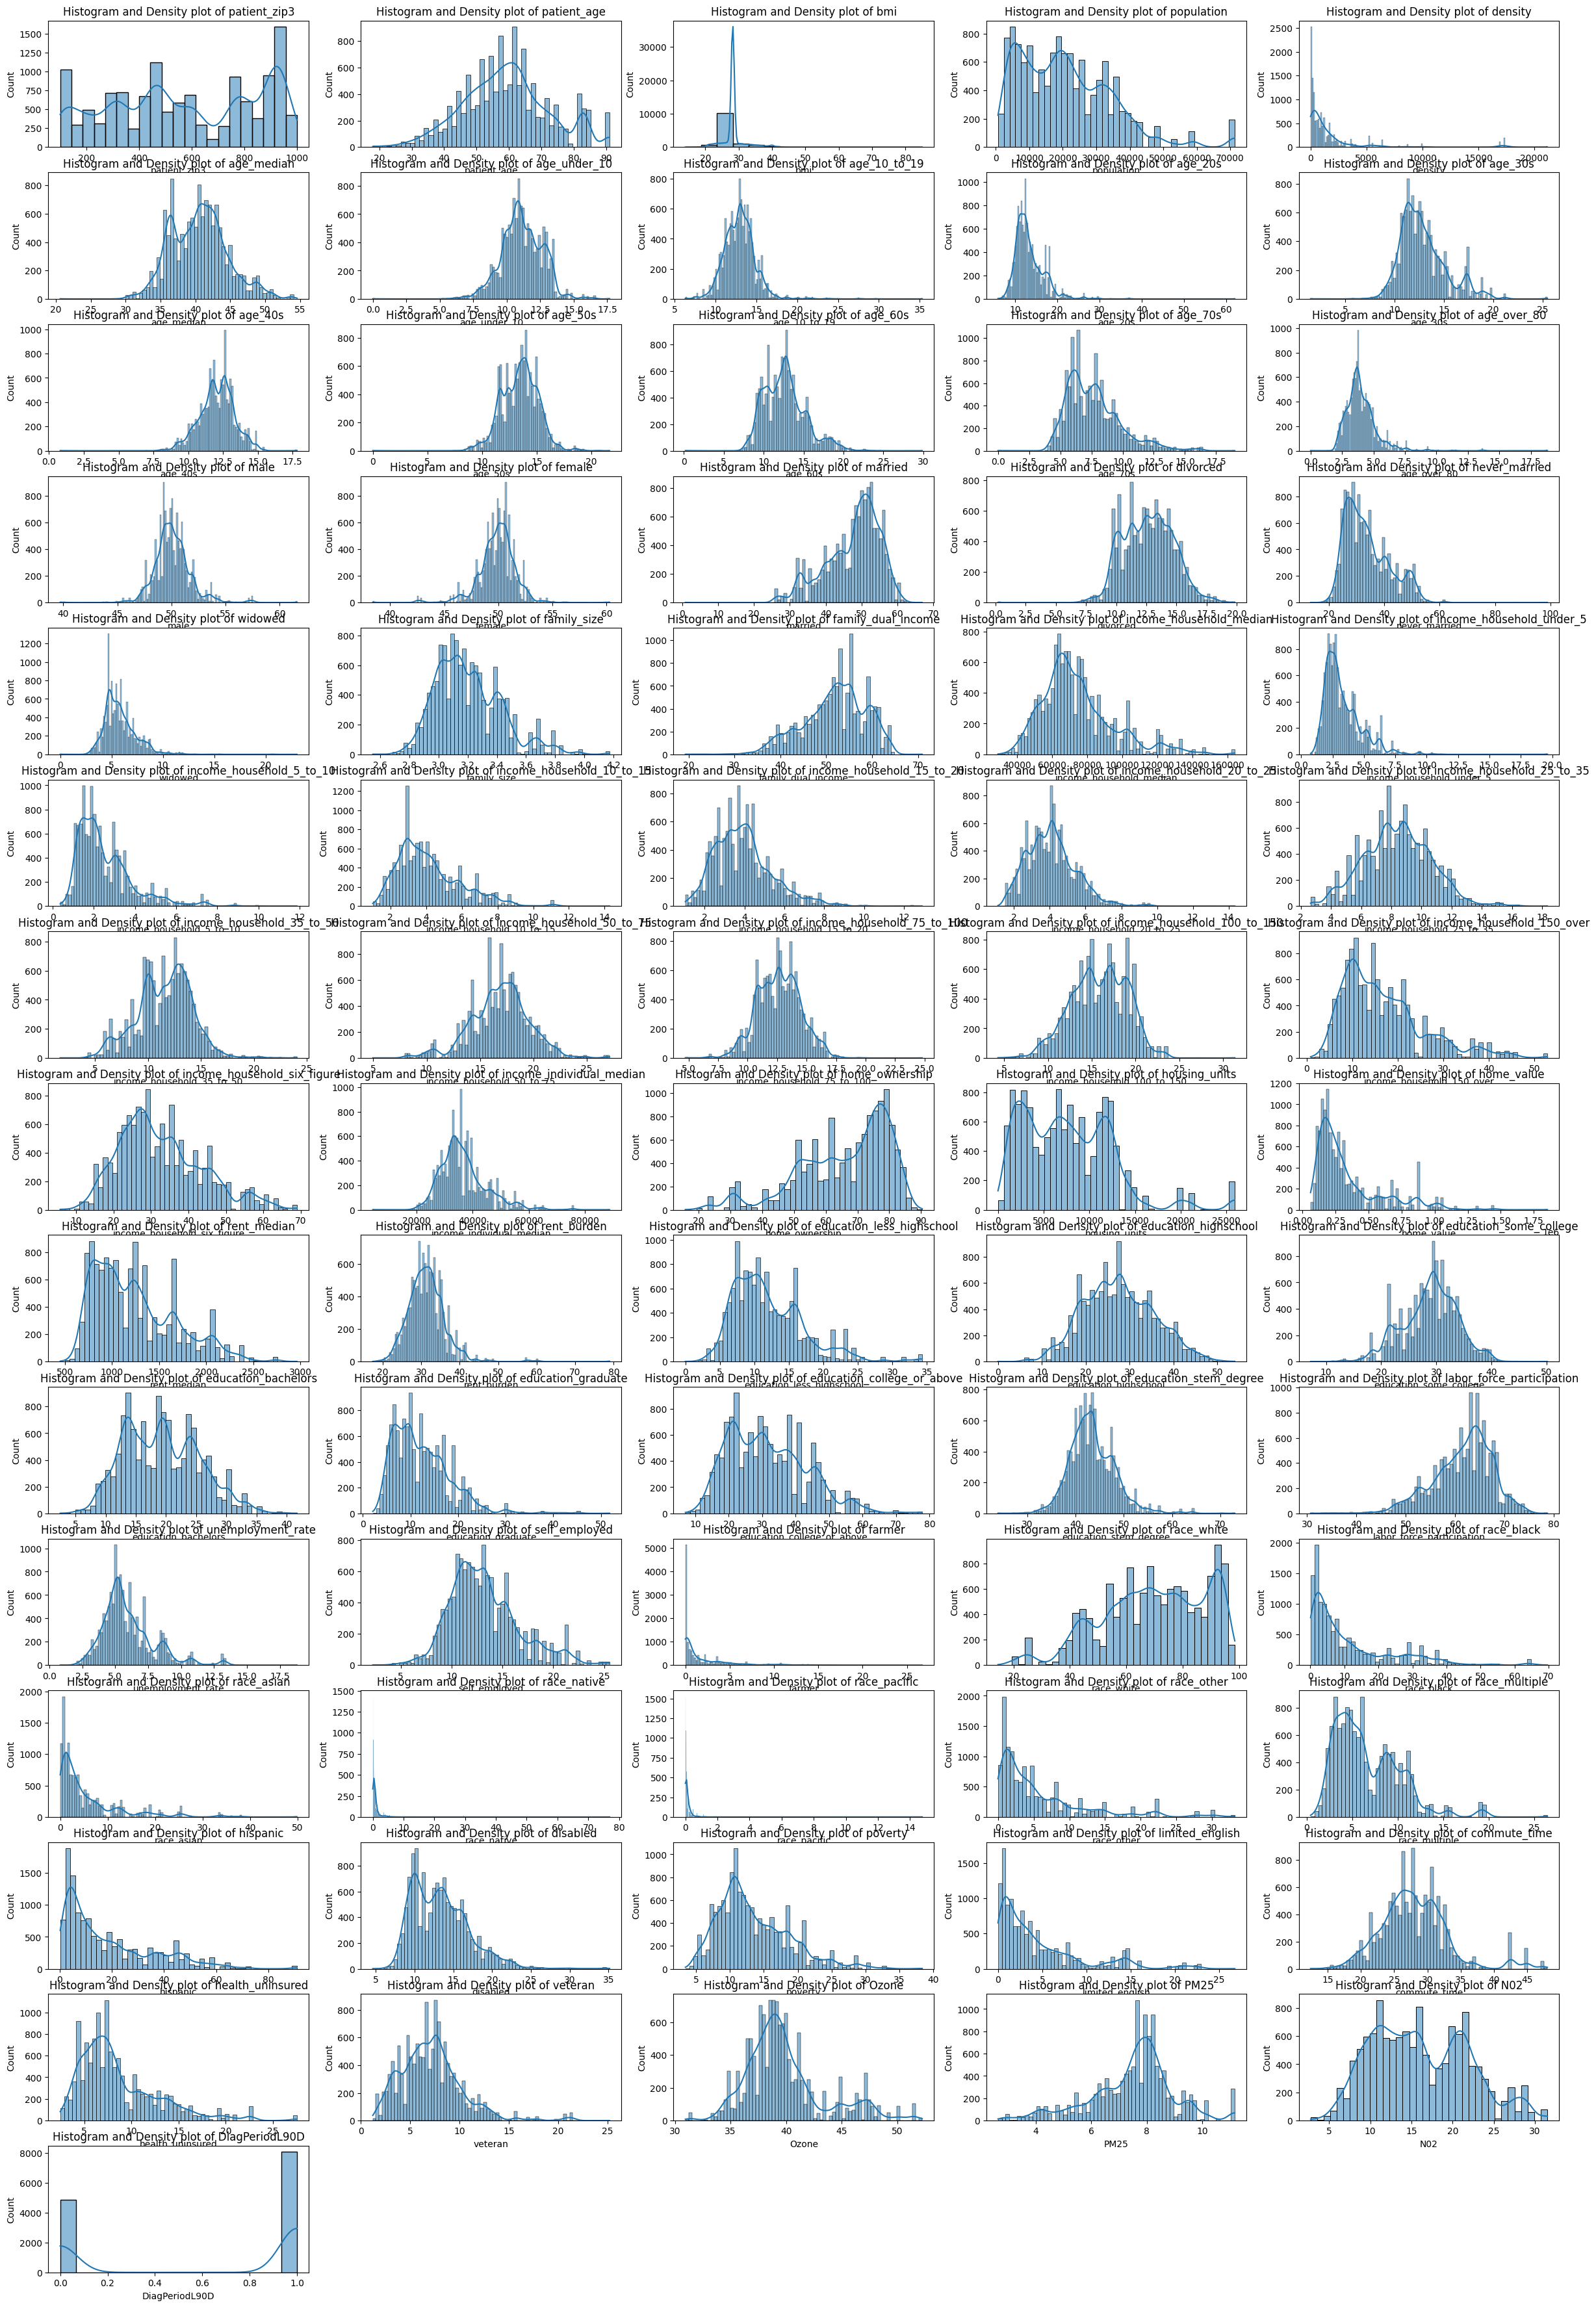

In [ ]:
### Plotting a histogram
numerical_cols = df_0.select_dtypes(include=['number']).columns
num_cols = 5  # Number of columns in the grid
num_rows = -(-len(numerical_cols) // num_cols)  # Ceiling division to calculate number of rows

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 3*num_rows))

# Flattening the axes
if num_rows == 1:
    axes = [axes]

# Plotting the  histograms
for i, col in enumerate(numerical_cols):
    row_index = i // num_cols  # Calculating row index
    col_index = i % num_cols   # Calculating column index
    sns.histplot(df[col], kde=True, ax=axes[row_index][col_index])
    axes[row_index][col_index].set_title(f"Histogram and Density plot of {col}")

# Removing empty subplots
for i in range(len(numerical_cols), num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index][col_index])

# Handling the outliers by using the MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Filtering the numerical, categorical target variable
target_var = "DiagPeriodL90D"
num_cols = df_0.select_dtypes(include=['number']).columns
num_cols = [col for col in num_cols if col != target_var]
cat_cols = df_0.select_dtypes(exclude=['number']).columns

# Initializing the scalar on the num_cols
scaler = MinMaxScaler()
df0_scaled = scaler.fit_transform(df[num_cols])

In [ ]:
### Converting the scaled features into a DataFrame
df0_scaled_df = pd.DataFrame(df0_scaled, columns= num_cols)
### Combining the scaled num_cols and categorical cols
scaled_df = pd.concat([df0_scaled_df, df_0[cat_cols], df_0[target_var]], axis = 1)
scaled_df.head()

patient_zip3  patient_age       bmi  population   density  age_median  \
0      0.916481     0.904110  0.199859    0.435437  0.056145    0.295639   
1      0.920935     0.602740  0.204085    0.544064  0.108404    0.518104   
2      0.733853     0.342466  0.339296    0.301973  0.029537    0.509469   
3      0.918708     0.369863  0.199859    0.454629  0.089523    0.655621   
4      0.818486     0.506849  0.199859    0.144910  0.005478    0.673343   

   age_under_10  age_10_to_19   age_20s   age_30s  ...  patient_state  \
0      0.906042      0.318383  0.208087  0.522050  ...             CA   
1      0.672067      0.242887  0.147847  0.497183  ...             CA   
2      0.737105      0.281140  0.117609  0.502473  ...             TX   
3      0.569812      0.200838  0.117723  0.457390  ...             CA   
4      0.612390      0.264327  0.063498  0.369774  ...             ID   

   patient_gender  breast_cancer_diagnosis_code  \
0               F                        C50919   
1               F                        C50411   
2               F                        C50112   
3               F                        C50212   
4               F                          1749   

                        breast_cancer_diagnosis_desc  \
0  Malignant neoplasm of unsp site of unspecified...   
1  Malig neoplm of upper-outer quadrant of right ...   
2  Malignant neoplasm of central portion of left ...   
3  Malig neoplasm of upper-inner quadrant of left...   
4  Malignant neoplasm of breast (female), unspeci...   

   metastatic_cancer_diagnosis_code  metastatic_first_novel_treatment  \
0                             C7989                     PEMBROLIZUMAB   
1                              C773                     PEMBROLIZUMAB   
2                              C773                     PEMBROLIZUMAB   
3                              C773                     PEMBROLIZUMAB   
4                              C773                     PEMBROLIZUMAB   

   metastatic_first_novel_treatment_type  Region            Division  \
0                        Antineoplastics    West             Pacific   
1                        Antineoplastics    West             Pacific   
2                        Antineoplastics   South  West South Central   
3                        Antineoplastics    West             Pacific   
4                        Antineoplastics    West            Mountain   

   DiagPeriodL90D  
0               1  
1               1  
2               1  
3               0  
4               0  

[5 rows x 82 columns]

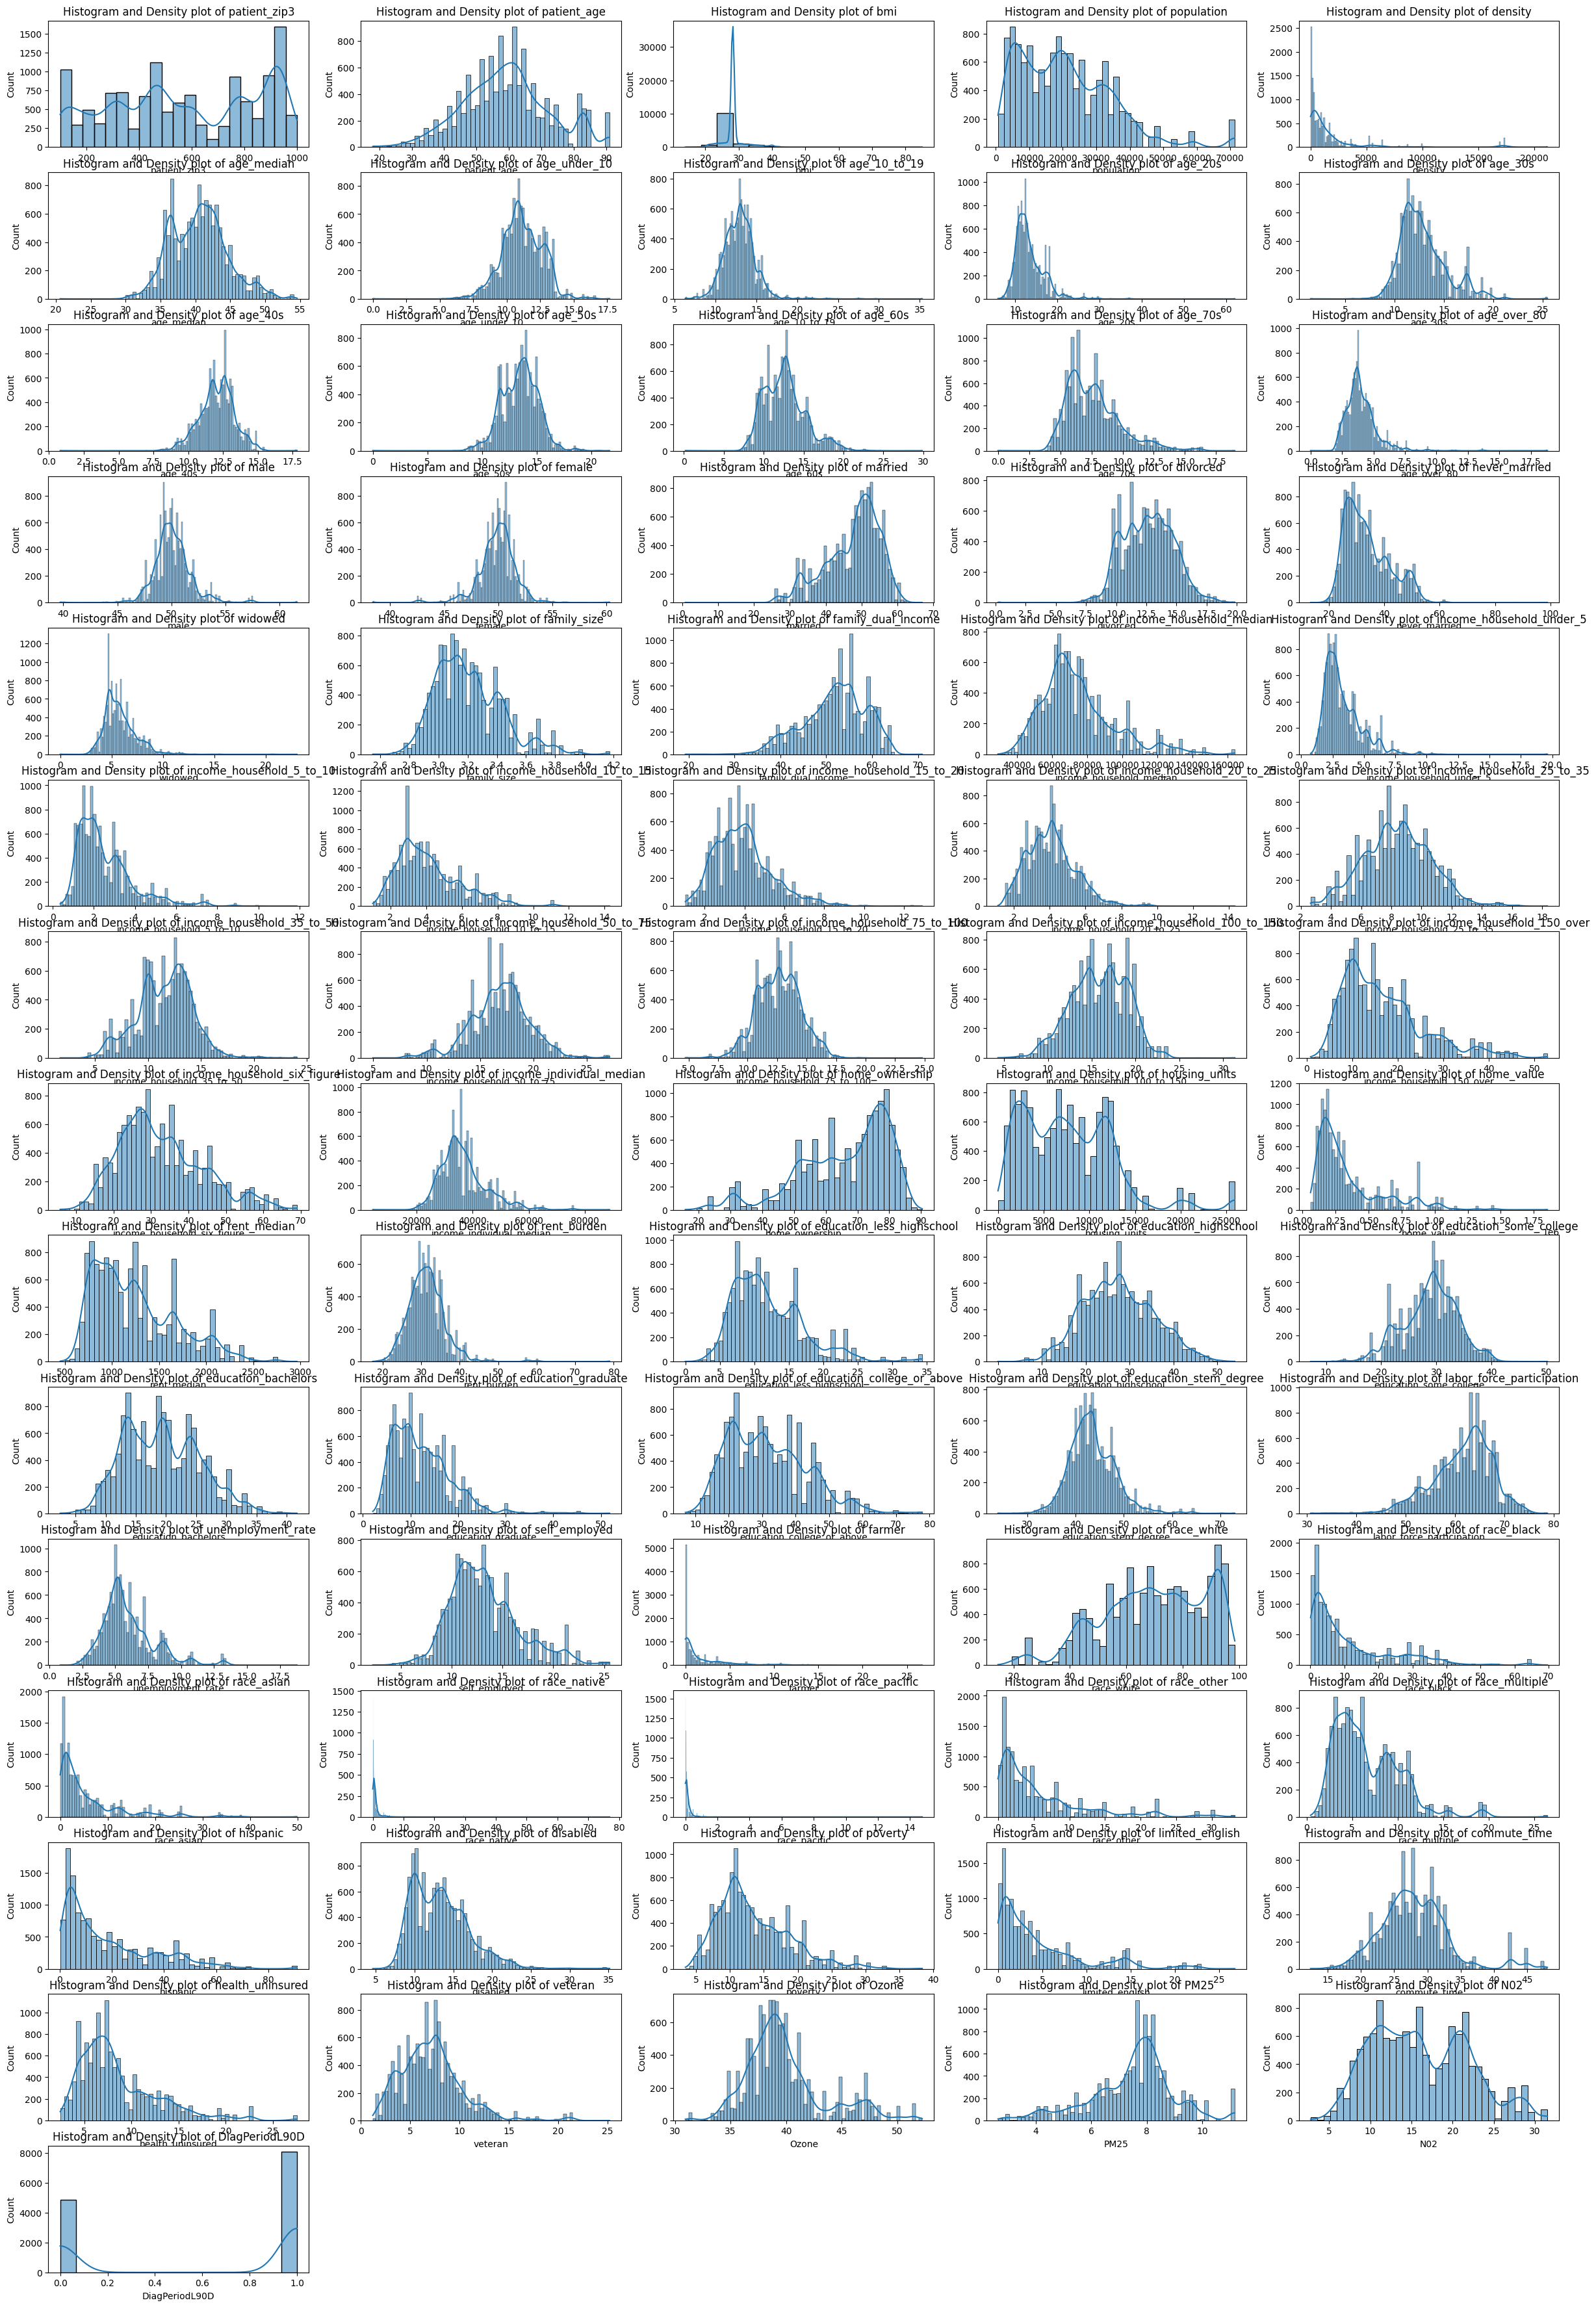

In [ ]:
###Ploting the histogram
numerical_cols = scaled_df.select_dtypes(include=['number']).columns
num_cols = 5  # Number of columns in the grid
num_rows = -(-len(numerical_cols) // num_cols)  # Ceiling division to calculate number of rows

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 3*num_rows))

# Flattening the axes
if num_rows == 1:
    axes = [axes]

# Plotting the  histograms
for i, col in enumerate(numerical_cols):
    row_index = i // num_cols  # Calculating row index
    col_index = i % num_cols   # Calculating column index
    sns.histplot(df[col], kde=True, ax=axes[row_index][col_index])
    axes[row_index][col_index].set_title(f"Histogram and Density plot of {col}")

# Removing empty subplots
for i in range(len(numerical_cols), num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index][col_index])

# One-Hot Encoding

In [ ]:
scaled_df.shape

(12906, 82)

In [ ]:
### One-Hot Encoding the dataset
##First let's list the categorical features
cat_cols = scaled_df.select_dtypes(exclude= ['number']).columns
print("Number of categorical columns:", len(cat_cols))
print("Categorical columns names:", cat_cols)

Number of categorical columns: 11
Categorical columns names: Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object')


In [ ]:
### One-Hot Encodding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown= 'ignore',
                    sparse_output= False).set_output(transform = 'pandas')

In [ ]:
ohetransform = ohe.fit_transform(scaled_df[['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division']])

In [ ]:
ohetransform

patient_race_Asian  patient_race_Black  patient_race_Hispanic  \
0                     0.0                 0.0                    0.0   
1                     0.0                 0.0                    0.0   
2                     0.0                 0.0                    0.0   
3                     0.0                 0.0                    0.0   
4                     0.0                 0.0                    0.0   
...                   ...                 ...                    ...   
12901                 0.0                 0.0                    0.0   
12902                 0.0                 0.0                    0.0   
12903                 0.0                 0.0                    0.0   
12904                 0.0                 0.0                    0.0   
12905                 0.0                 0.0                    1.0   

       patient_race_Other  patient_race_White  payer_type_COMMERCIAL  \
0                     0.0                 1.0                    0.0   
1                     0.0                 1.0                    1.0   
2                     0.0                 1.0                    1.0   
3                     0.0                 1.0                    1.0   
4                     0.0                 1.0                    1.0   
...                   ...                 ...                    ...   
12901                 0.0                 1.0                    1.0   
12902                 0.0                 1.0                    1.0   
12903                 0.0                 1.0                    1.0   
12904                 0.0                 1.0                    1.0   
12905                 0.0                 0.0                    0.0   

       payer_type_MEDICAID  payer_type_MEDICARE ADVANTAGE  patient_state_AK  \
0                      1.0                            0.0               0.0   
1                      0.0                            0.0               0.0   
2                      0.0                            0.0               0.0   
3                      0.0                            0.0               0.0   
4                      0.0                            0.0               0.0   
...                    ...                            ...               ...   
12901                  0.0                            0.0               0.0   
12902                  0.0                            0.0               0.0   
12903                  0.0                            0.0               0.0   
12904                  0.0                            0.0               0.0   
12905                  1.0                            0.0               0.0   

       patient_state_AL  ...  Region_West  Division_East North Central  \
0                   0.0  ...          1.0                          0.0   
1                   0.0  ...          1.0                          0.0   
2                   0.0  ...          0.0                          0.0   
3                   0.0  ...          1.0                          0.0   
4                   0.0  ...          1.0                          0.0   
...                 ...  ...          ...                          ...   
12901               0.0  ...          0.0                          1.0   
12902               0.0  ...          1.0                          0.0   
12903               0.0  ...          1.0                          0.0   
12904               0.0  ...          0.0                          0.0   
12905               0.0  ...          0.0                          0.0   

       Division_East South Central  Division_Middle Atlantic  \
0                              0.0                       0.0   
1                              0.0                       0.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       0.0   
...                            ...                     

In [ ]:
### Combining the encoded data with the scaled numerical feature
encoded_df = pd.concat([scaled_df, ohetransform], axis=1).drop(columns = ['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'])

In [ ]:
encoded_df.head()

patient_zip3  patient_age       bmi  population   density  age_median  \
0      0.916481     0.904110  0.199859    0.435437  0.056145    0.295639   
1      0.920935     0.602740  0.204085    0.544064  0.108404    0.518104   
2      0.733853     0.342466  0.339296    0.301973  0.029537    0.509469   
3      0.918708     0.369863  0.199859    0.454629  0.089523    0.655621   
4      0.818486     0.506849  0.199859    0.144910  0.005478    0.673343   

   age_under_10  age_10_to_19   age_20s   age_30s  ...  Region_West  \
0      0.906042      0.318383  0.208087  0.522050  ...          1.0   
1      0.672067      0.242887  0.147847  0.497183  ...          1.0   
2      0.737105      0.281140  0.117609  0.502473  ...          0.0   
3      0.569812      0.200838  0.117723  0.457390  ...          1.0   
4      0.612390      0.264327  0.063498  0.369774  ...          1.0   

   Division_East North Central  Division_East South Central  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Division_Middle Atlantic  Division_Mountain  Division_New England  \
0                       0.0                0.0                   0.0   
1                       0.0                0.0                   0.0   
2                       0.0                0.0                   0.0   
3                       0.0                0.0                   0.0   
4                       0.0                1.0                   0.0   

   Division_Pacific  Division_South Atlantic  Division_West North Central  \
0               1.0                      0.0                          0.0   
1               1.0                      0.0                          0.0   
2               0.0                      0.0                          0.0   
3               1.0                      0.0                          0.0   
4               0.0                      0.0                          0.0   

   Division_West South Central  
0                          0.0  
1                          0.0  
2                          1.0  
3                          0.0  
4                          0.0  

[5 rows x 289 columns]

# Picking Relevant Features to my dataset

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

# Removing constant features
constant_filter = VarianceThreshold(threshold=0)
X_filtered = constant_filter.fit_transform(encoded_df)

# Getting  the indices of non-constant features
non_constant_indices = constant_filter.get_support(indices=True)

# Selecting non-constant features from the original Df
X_non_constant = encoded_df.iloc[:, non_constant_indices]

target = encoded_df['DiagPeriodL90D']

# Performing ANOVA
f_scores, p_values = f_classif(X_non_constant, target)

# Creating a dictionary mapping feature names to F-scores and p-values
feature_scores = {col: (f_score, p_value) for col, f_score, p_value in zip(X_non_constant.columns, f_scores, p_values)}

# Filtering features with lower p-values and higher F-scores
selected_features = [col for col, (f_score, p_value) in feature_scores.items() if p_value < 0.05 and f_score > 10 and col!= 'DiagPeriodL90D']

# Printing selected features along with their F-scores and p-values
for col in selected_features:
    f_score, p_value = feature_scores[col]
    print(f"Feature: {col}, F-score = {f_score}, p-value = {p_value}")

Feature: patient_zip3, F-score = 17.093960545847803, p-value = 3.580026397409892e-05
Feature: patient_age, F-score = 40.063298755444364, p-value = 2.5400381547879544e-10
Feature: widowed, F-score = 12.835205264104697, p-value = 0.00034141051125526355
Feature: income_household_25_to_35, F-score = 10.892668051457024, p-value = 0.0009680750352154015
Feature: income_individual_median, F-score = 14.255658336079327, p-value = 0.00016029590721871833
Feature: home_value, F-score = 11.813308029936863, p-value = 0.0005899429050768488
Feature: education_less_highschool, F-score = 16.679463281278885, p-value = 4.452467994017779e-05
Feature: education_bachelors, F-score = 18.371348208307165, p-value = 1.8308991148894693e-05
Feature: education_college_or_above, F-score = 10.930596974406173, p-value = 0.000948472061983279
Feature: labor_force_participation, F-score = 10.232087105307313, p-value = 0.0013835185279819267
Feature: health_uninsured, F-score = 10.516960284348485, p-value = 0.00118584520453

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
### Putting that those featurs into a dataframe
selected_df = encoded_df[selected_features].copy()
selected_df.head()

patient_zip3  patient_age   widowed  income_household_25_to_35  \
0      0.916481     0.904110  0.192711                   0.477556   
1      0.920935     0.602740  0.201761                   0.160206   
2      0.733853     0.342466  0.204298                   0.262163   
3      0.918708     0.369863  0.200560                   0.110322   
4      0.818486     0.506849  0.234487                   0.561632   

   income_individual_median  home_value  education_less_highschool  \
0                  0.239349    0.113812                   0.968878   
1                  0.437041    0.344249                   0.414570   
2                  0.426541    0.098793                   0.314975   
3                  0.603116    0.531021                   0.170011   
4                  0.292657    0.105561                   0.337243   

   education_bachelors  education_college_or_above  labor_force_participation  \
0             0.150160                    0.064513                   0.642664   
1             0.542222                    0.408887                   0.719831   
2             0.438714                    0.321396                   0.744806   
3             0.785537                    0.688115                   0.703168   
4             0.293424                    0.178233                   0.558432   

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   breast_cancer_diagnosis_desc_Malignant neoplasm of upper-inner quadrant of female breast  \
0                                                0.0                                          
1                                                0.0                                          
2                                                0.0                                          
3                                                0.0                                          
4                                                0.0                                          

   breast_cancer_diagnosis_desc_Malignant neoplasm of upper-outer quadrant of female breast  \
0                                                0.0                                          
1                                                0.0                                          
2                                                0.0                                          
3                                                0.0                                          
4                                                0.0                                          

   breast_cancer_diagnosis_desc_Secondary malignant neoplasm of breast  \
0                                                0.0                     
1                                                0.0                     
2                                                0.0                     
3                                                0.0                     
4                                                0.0                     

   metastatic_cancer_diagnosis_code_C773  \
0                                    0.0   
1                                    1.0   
2                                    1.0   
3                                    1.0   
4                                    1.0   

   metastatic_cancer_diagnosis_code_C779  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   metastatic_cancer_diagnosis_code_C7951  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   metastatic_cancer_diagnosis_code_C7981  Region_South  Region_West  \
0                                     0.0           0.0          1.0   
1                                     0.0           0.0          1.0   
2              

In [ ]:
selected_df.columns

Index(['patient_zip3', 'patient_age', 'widowed', 'income_household_25_to_35',
       'income_individual_median', 'home_value', 'education_less_highschool',
       'education_bachelors', 'education_college_or_above',
       'labor_force_participation', 'health_uninsured', 'patient_state_CO',
       'patient_state_NY', 'breast_cancer_diagnosis_code_1741',
       'breast_cancer_diagnosis_code_1742',
       'breast_cancer_diagnosis_code_1743',
       'breast_cancer_diagnosis_code_1744',
       'breast_cancer_diagnosis_code_1745',
       'breast_cancer_diagnosis_code_1748',
       'breast_cancer_diagnosis_code_1749',
       'breast_cancer_diagnosis_code_19881',
       'breast_cancer_diagnosis_code_C50011',
       'breast_cancer_diagnosis_code_C50012',
       'breast_cancer_diagnosis_code_C50111',
       'breast_cancer_diagnosis_code_C50112',
       'breast_cancer_diagnosis_code_C50211',
       'breast_cancer_diagnosis_code_C50212',
       'breast_cancer_diagnosis_code_C50311',
       'breas

# Creating the Binary Classification Model using Deep Learning algorithm

In [ ]:
target_column_name = 'DiagPeriodL90D'
target_variable = encoded_df[target_column_name]

# Addingthe target variable to the selected_df
selected_df[target_column_name] = target_variable

[0 1] [4846 8060]


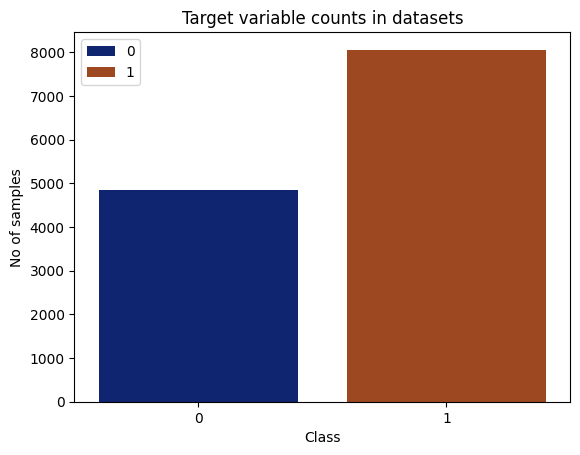

In [ ]:
### Checking and plotting for the class in the target variable
(unique, counts) = np.unique(selected_df['DiagPeriodL90D'], return_counts=True)
print(unique, counts)
sns.barplot(x=unique, y=counts, hue=unique, palette='dark', legend=True)
plt.xlabel("Class")
plt.ylabel("No of samples")
plt.xticks()
plt.title("Target variable counts in datasets")
plt.show()
plt.close()

Number of samples in category 0: 4846
Number of samples in category 1: 8060


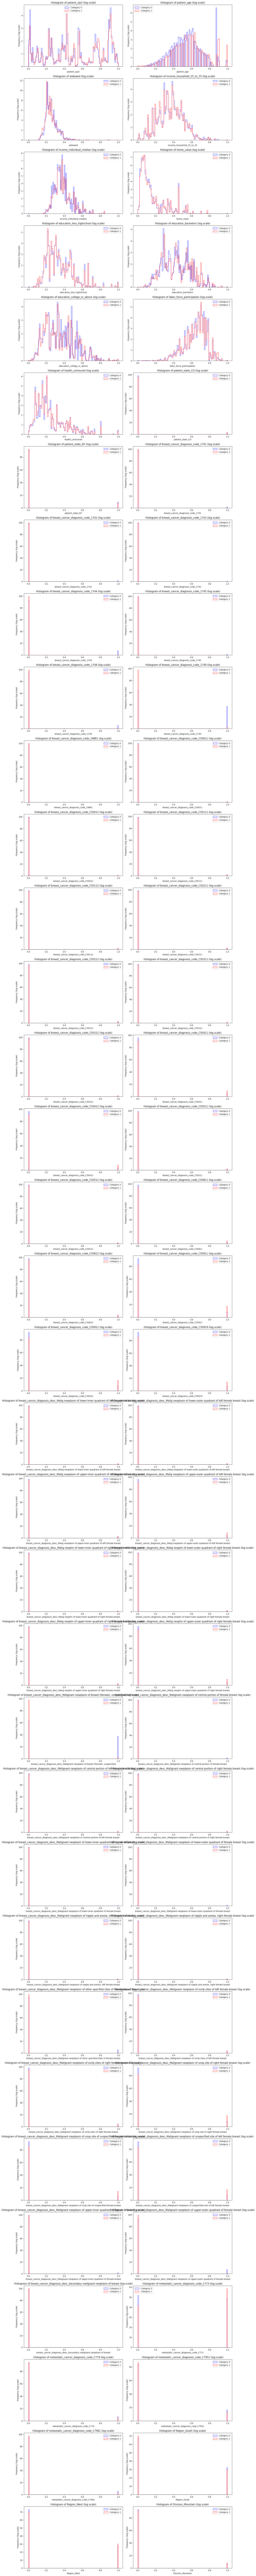

In [ ]:
###Comparing the variables for the target categories using a histogram
# Split data based on categories
category_0 = selected_df[selected_df['DiagPeriodL90D'] == 0]
category_1 = selected_df[selected_df['DiagPeriodL90D'] == 1]

print("Number of samples in category 0:", len(category_0))
print("Number of samples in category 1:", len(category_1))

# Determining the number of columns and rows based on the number of features
num_features = len(selected_df.columns[:-1])
num_rows = (num_features + 1) // 2

# Creating subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(selected_df.columns[:-1]):
    ax = axes[i]
    ax.hist(category_0[feature], bins=100, histtype="step", color="blue", label="Category 0", density=True)
    ax.hist(category_1[feature], bins=100, histtype="step", color="red", label="Category 1", density=True)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency (log scale)')
    ax.set_title('Histogram of {} (log scale)'.format(feature))
    ax.legend()

# Hide unused subplots
for i in range(num_features, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#### Balancing my target variable avoid baises in the model
from sklearn.utils import resample

# Splitting majority and minority classes
minority_class = selected_df[selected_df['DiagPeriodL90D'] == 0]
majority_class = selected_df[selected_df['DiagPeriodL90D'] == 1]

# Downsampling the majority class
majority_downsampled = resample(majority_class,
                                replace=False,
                                n_samples=len(minority_class),  # Matching the minority class size
                                random_state=42)

# Combining the minority class with downsampled majority class
balanced_df = pd.concat([minority_class, majority_downsampled])

# Displaying the new class counts
balanced_df['DiagPeriodL90D'].value_counts()

DiagPeriodL90D
0    4846
1    4846
Name: count, dtype: int64

In [ ]:
balanced_df.dtypes

patient_zip3                              float64
patient_age                               float64
widowed                                   float64
income_household_25_to_35                 float64
income_individual_median                  float64
                                           ...   
metastatic_cancer_diagnosis_code_C7981    float64
Region_South                              float64
Region_West                               float64
Division_Mountain                         float64
DiagPeriodL90D                              int64
Length: 71, dtype: object

# Creating the Deep Learning Model, trying FNN because its the best choices for handling a tabular dataset which is what I have

In [ ]:
from tensorflow.keras.metrics import Precision as KerasPrecision, Recall as KerasRecall

### Spliting the dataset
X = balanced_df.drop('DiagPeriodL90D', axis = 1) # Features
y = balanced_df['DiagPeriodL90D']  #Target variable

### Defining the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1], )),
    Dense(32, activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])

#Defining the metrics
precision = KerasPrecision()
recall = KerasRecall()

##Compiling the model
model.compile(optimizer='adam', loss = 'binary_crossentropy',
              metrics= ['accuracy', precision, recall])

# Training the model
model.fit(X, y, epochs=10, batch_size = 32, validation_split=0.2)

## Evalution metrics
loss, accuracy, precision, recall  = model.evaluate(X, y)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Epoch 1/10
243/243 [==============================] - 2s 4ms/step - loss: 0.5441 - accuracy: 0.6688 - precision_1: 0.5585 - recall_1: 0.5569 - val_loss: 0.7087 - val_accuracy: 0.7313 - val_precision_1: 1.0000 - val_recall_1: 0.7313
Epoch 2/10
243/243 [==============================] - 1s 3ms/step - loss: 0.4882 - accuracy: 0.7180 - precision_1: 0.5897 - recall_1: 0.8156 - val_loss: 0.5765 - val_accuracy: 0.9118 - val_precision_1: 1.0000 - val_recall_1: 0.9118
Epoch 3/10
243/243 [==============================] - 1s 3ms/step - loss: 0.4837 - accuracy: 0.7211 - precision_1: 0.5913 - recall_1: 0.8297 - val_loss: 0.6188 - val_accuracy: 0.8716 - val_precision_1: 1.0000 - val_recall_1: 0.8716
Epoch 4/10
243/243 [==============================] - 1s 4ms/step - loss: 0.4814 - accuracy: 0.7237 - precision_1: 0.5959 - recall_1: 0.8173 - val_loss: 0.7837 - val_accuracy: 0.6111 - val_precision_1: 1.0000 - val_recall_1: 0.6111
Epoch 5/10
243/243 [==============================] - 1s 4ms/step - loss

303/303 [==============================] - 1s 4ms/step


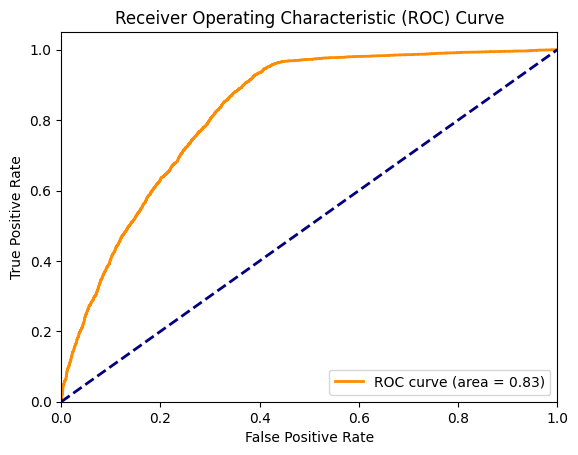

In [ ]:
from sklearn.metrics import roc_curve, auc

# Make predictions on the test data
y_pred_probs = model.predict(X)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Trying the FNN model out on a new dataset

In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head()

patient_id patient_race          payer_type patient_state  patient_zip3  \
0      573710        White            MEDICAID            IN           467   
1      593679          NaN          COMMERCIAL            FL           337   
2      184532     Hispanic            MEDICAID            CA           917   
3      447383     Hispanic  MEDICARE ADVANTAGE            CA           917   
4      687972        Black                 NaN            CA           900   

   patient_age patient_gender   bmi breast_cancer_diagnosis_code  \
0           54              F   NaN                       C50412   
1           52              F   NaN                       C50912   
2           61              F   NaN                       C50911   
3           64              F   NaN                       C50912   
4           40              F  23.0                       C50412   

                        breast_cancer_diagnosis_desc  ...   hispanic  \
0  Malig neoplasm of upper-outer quadrant of left...  ...   3.564516   
1  Malignant neoplasm of unspecified site of left...  ...  10.261538   
2  Malignant neoplasm of unsp site of right femal...  ...  47.726087   
3  Malignant neoplasm of unspecified site of left...  ...  47.726087   
4  Malig neoplasm of upper-outer quadrant of left...  ...  45.526154   

    disabled    poverty limited_english commute_time  health_uninsured  \
0  13.996774   7.985484        0.969355    24.955357         10.838710   
1  16.020513  13.602564        2.836842    23.952632         10.579487   
2   9.895652  10.515217       12.745652    32.530435          7.263043   
3   9.895652  10.515217       12.745652    32.530435          7.263043   
4  11.901538  20.760000       14.737500    30.709375         10.341538   

    veteran      Ozone       PM25        N02  
0  8.080645  38.724876   7.947165  11.157161  
1  9.302564  36.918257   7.838973  13.599985  
2  3.810870  47.310325   9.595719  20.084231  
3  3.810870  47.310325   9.595719  20.084231  
4  3.030769  41.186992  11.166898  21.644261  

[5 rows x 82 columns]

In [ ]:
test_df.shape

(5792, 82)

In [ ]:
test_df.dtypes

patient_id            int64
patient_race         object
payer_type           object
patient_state        object
patient_zip3          int64
                     ...   
health_uninsured    float64
veteran             float64
Ozone               float64
PM25                float64
N02                 float64
Length: 82, dtype: object

# Pre-processing the testing dataset

In [ ]:
## Checking for the missing data
missing_data =test_df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 patient_id             0
patient_race        2901
payer_type           760
patient_state         21
patient_zip3           0
                    ... 
health_uninsured       0
veteran                0
Ozone                 14
PM25                  14
N02                   14
Length: 82, dtype: int64


In [ ]:
# Handling for missing numerical data
for col in test_df.select_dtypes(include=['number']).columns:
    test_df[col] = test_df[col].fillna(test_df[col].median())
## Handling for missing categorical data
for col in test_df.select_dtypes(include=['object']).columns:
    test_df[col] =test_df[col].fillna(test_df[col].mode()[0])

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             5792 non-null   int64  
 1   patient_race                           5792 non-null   object 
 2   payer_type                             5792 non-null   object 
 3   patient_state                          5792 non-null   object 
 4   patient_zip3                           5792 non-null   int64  
 5   patient_age                            5792 non-null   int64  
 6   patient_gender                         5792 non-null   object 
 7   bmi                                    5792 non-null   float64
 8   breast_cancer_diagnosis_code           5792 non-null   object 
 9   breast_cancer_diagnosis_desc           5792 non-null   object 
 10  metastatic_cancer_diagnosis_code       5792 non-null   object 
 11  meta

In [ ]:
### Checking for the duplicates
duplicates = test_df.duplicated().sum()
print("Number of dduplicates:", duplicates)

Number of dduplicates: 0


In [ ]:
### Checking for Invalid Entries for the test_Df
invalid_entries = test_df[test_df.select_dtypes(include=['number'])< 0].count()
print("Invalid Entries", invalid_entries)

Invalid Entries patient_id          0
patient_race        0
payer_type          0
patient_state       0
patient_zip3        0
                   ..
health_uninsured    0
veteran             0
Ozone               0
PM25                0
N02                 0
Length: 82, dtype: int64


In [ ]:
## Extracting the test ID columns as a 1D array
test_ID = test_df['patient_id'].values
test_df0 = test_df.drop(["patient_id"], axis =1)

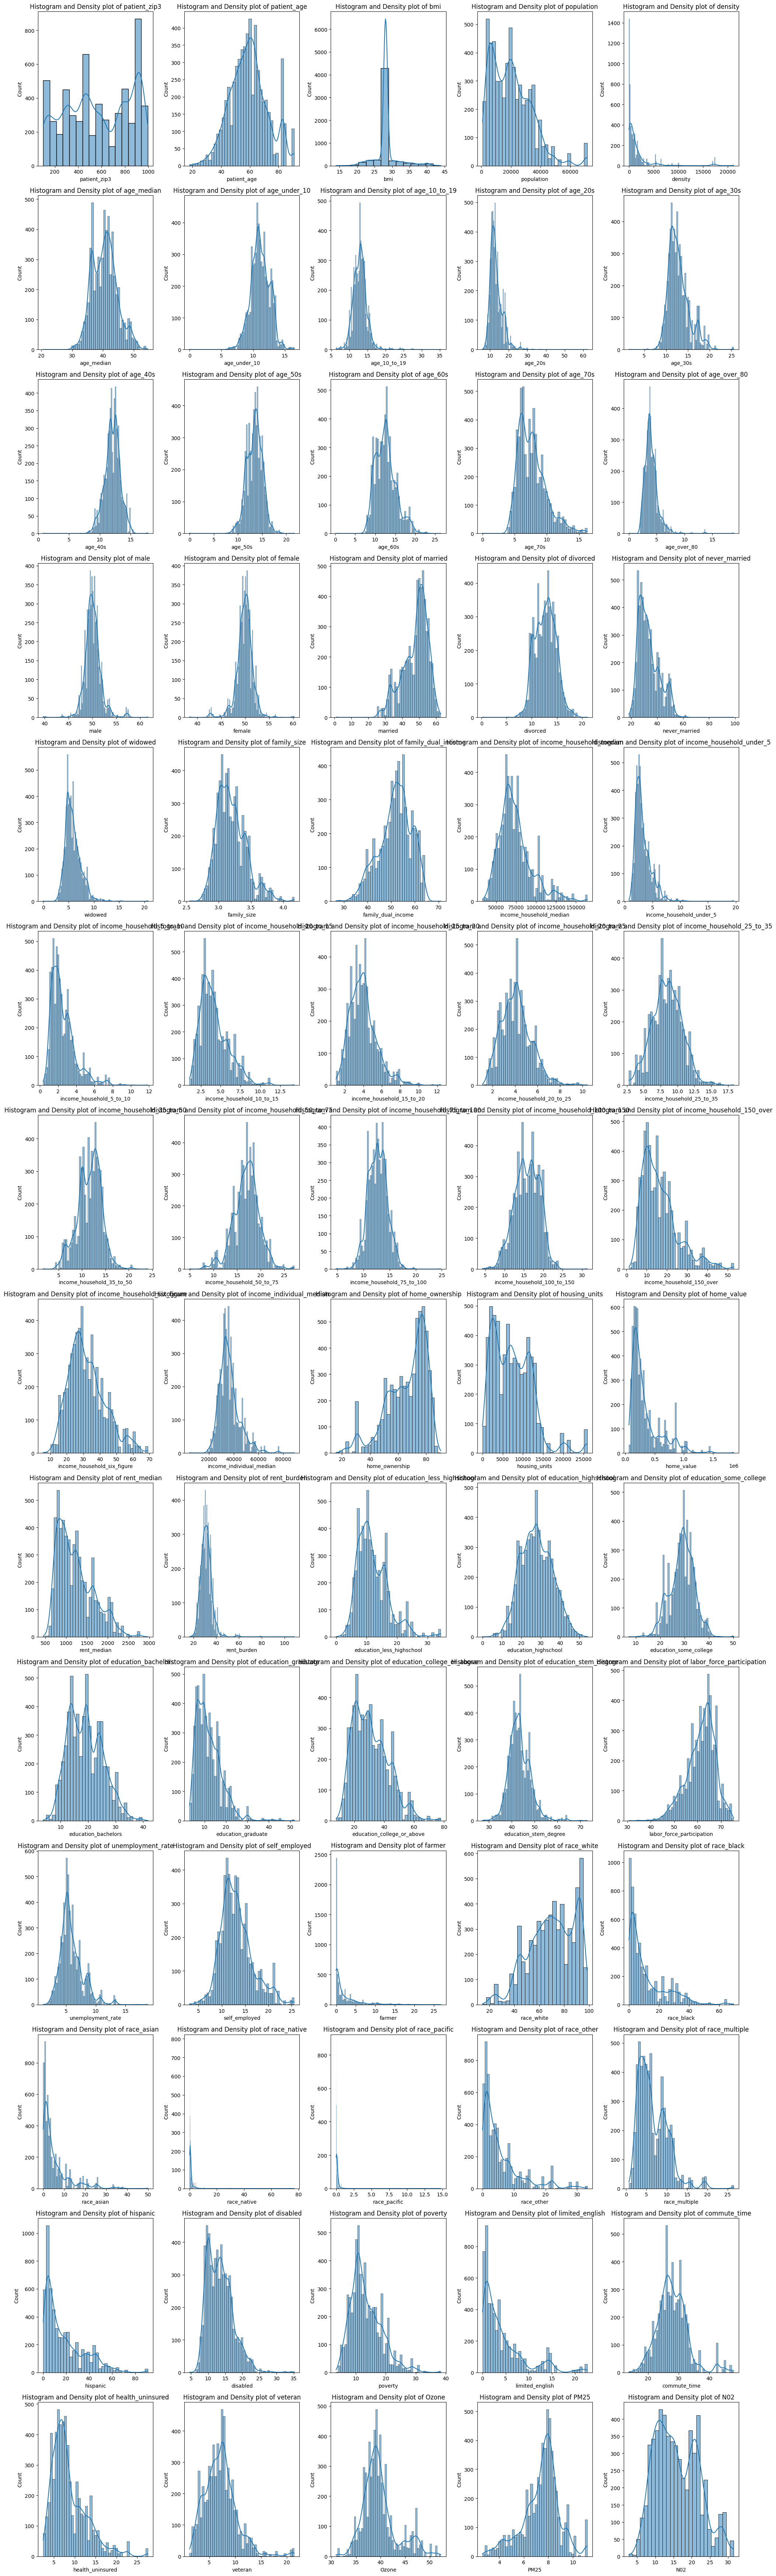

In [ ]:
### Plotting a histogram
numerical_cols = test_df0.select_dtypes(include=['number']).columns
num_cols = 5  # Number of columns in the grid
num_rows = -(-len(numerical_cols) // num_cols)  # Ceiling division to calculate number of rows

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))

# Flattening the axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Plotting the histograms
for i, col in enumerate(numerical_cols):
    row_index = i // num_cols  # Calculating row index
    col_index = i % num_cols   # Calculating column index
    sns.histplot(test_df0[col], kde=True, ax=axes[row_index][col_index])
    axes[row_index][col_index].set_title(f"Histogram and Density plot of {col}")

# Hiding empty subplots if there are any
for ax in axes.flat[len(numerical_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

### Handling Outliers on the testing dataset still using the MinMaxScaler just to keep everything consistent in General.

In [ ]:
# Filtering the numerical& categorical variable
num_cols = test_df0.select_dtypes(include=['number']).columns
num_cols = [col for col in num_cols if col != target_var]
cat_cols = test_df0.select_dtypes(exclude=['number']).columns

# Initializing the scalar on the num_cols
scaler = MinMaxScaler()
test_scaled_df = scaler.fit_transform(test_df0[num_cols])
### Converting the scaled features into a DataFrame
test_scaled_df = pd.DataFrame(test_scaled_df, columns= num_cols)
### Combining the scaled num_cols and categorical cols
test_scaled = pd.concat([test_scaled_df, test_df0[cat_cols]], axis = 1)
test_scaled.head()

patient_zip3  patient_age       bmi  population   density  age_median  \
0      0.408939     0.493151  0.473244    0.065376  0.004005    0.597007   
1      0.263687     0.465753  0.473244    0.266276  0.073415    0.839202   
2      0.911732     0.589041  0.473244    0.598217  0.096724    0.537303   
3      0.911732     0.630137  0.473244    0.598217  0.096724    0.537303   
4      0.892737     0.301370  0.301003    0.499324  0.250034    0.472589   

   age_under_10  age_10_to_19   age_20s   age_30s  ...          payer_type  \
0      0.772503      0.268216  0.084284  0.422411  ...            MEDICAID   
1      0.489584      0.078414  0.084728  0.408927  ...          COMMERCIAL   
2      0.686000      0.227131  0.145914  0.501956  ...            MEDICAID   
3      0.686000      0.227131  0.145914  0.501956  ...  MEDICARE ADVANTAGE   
4      0.592261      0.170891  0.201315  0.665022  ...          COMMERCIAL   

   patient_state  patient_gender  breast_cancer_diagnosis_code  \
0             IN               F                        C50412   
1             FL               F                        C50912   
2             CA               F                        C50911   
3             CA               F                        C50912   
4             CA               F                        C50412   

                        breast_cancer_diagnosis_desc  \
0  Malig neoplasm of upper-outer quadrant of left...   
1  Malignant neoplasm of unspecified site of left...   
2  Malignant neoplasm of unsp site of right femal...   
3  Malignant neoplasm of unspecified site of left...   
4  Malig neoplasm of upper-outer quadrant of left...   

   metastatic_cancer_diagnosis_code  metastatic_first_novel_treatment  \
0                              C773                     PEMBROLIZUMAB   
1                              C787                     PEMBROLIZUMAB   
2                              C773                     PEMBROLIZUMAB   
3                              C779                     PEMBROLIZUMAB   
4                              C779                     PEMBROLIZUMAB   

   metastatic_first_novel_treatment_type   Region            Division  
0                        Antineoplastics  Midwest  East North Central  
1                        Antineoplastics    South      South Atlantic  
2                        Antineoplastics     West             Pacific  
3                        Antineoplastics     West             Pacific  
4                        Antineoplastics     West             Pacific  

[5 rows x 81 columns]

In [ ]:
test_scaled.shape

(5792, 81)

# One Hot Encoding

In [ ]:
### Listing out the categorical variables
categorical_cols = test_df0.select_dtypes(exclude=['number']).columns
print("Number of categorical columns:", len(categorical_cols))
print("Categorical column names:", categorical_cols)

Number of categorical columns: 11
Categorical column names: Index(['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'],
      dtype='object')


In [ ]:
ohe = OneHotEncoder(handle_unknown= 'ignore',
                    sparse_output = False).set_output(transform='pandas')

In [ ]:
ohetransform = ohe.fit_transform(test_scaled[['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division']])
ohetransform

patient_race_Asian  patient_race_Black  patient_race_Hispanic  \
0                    0.0                 0.0                    0.0   
1                    0.0                 0.0                    0.0   
2                    0.0                 0.0                    1.0   
3                    0.0                 0.0                    1.0   
4                    0.0                 1.0                    0.0   
...                  ...                 ...                    ...   
5787                 0.0                 0.0                    0.0   
5788                 0.0                 0.0                    0.0   
5789                 0.0                 0.0                    0.0   
5790                 0.0                 0.0                    0.0   
5791                 0.0                 0.0                    1.0   

      patient_race_Other  patient_race_White  payer_type_COMMERCIAL  \
0                    0.0                 1.0                    0.0   
1                    0.0                 1.0                    1.0   
2                    0.0                 0.0                    0.0   
3                    0.0                 0.0                    0.0   
4                    0.0                 0.0                    1.0   
...                  ...                 ...                    ...   
5787                 0.0                 1.0                    1.0   
5788                 0.0                 1.0                    1.0   
5789                 0.0                 1.0                    0.0   
5790                 0.0                 1.0                    1.0   
5791                 0.0                 0.0                    0.0   

      payer_type_MEDICAID  payer_type_MEDICARE ADVANTAGE  patient_state_AK  \
0                     1.0                            0.0               0.0   
1                     0.0                            0.0               0.0   
2                     1.0                            0.0               0.0   
3                     0.0                            1.0               0.0   
4                     0.0                            0.0               0.0   
...                   ...                            ...               ...   
5787                  0.0                            0.0               0.0   
5788                  0.0                            0.0               0.0   
5789                  0.0                            1.0               0.0   
5790                  0.0                            0.0               0.0   
5791                  0.0                            1.0               0.0   

      patient_state_AL  ...  Region_West  Division_East North Central  \
0                  0.0  ...          0.0                          1.0   
1                  0.0  ...          0.0                          0.0   
2                  0.0  ...          1.0                          0.0   
3                  0.0  ...          1.0                          0.0   
4                  0.0  ...          1.0                          0.0   
...                ...  ...          ...                          ...   
5787               0.0  ...          0.0                          0.0   
5788               0.0  ...          0.0                          0.0   
5789               0.0  ...          1.0                          0.0   
5790               0.0  ...          0.0                          0.0   
5791               0.0  ...          0.0                          0.0   

      Division_East South Central  Division_Middle Atlantic  \
0                             0.0                       0.0   
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             0.0                       0.0   
4                             0.0                       0.0   
...                           ...                       ...   
5787                          1.0            

In [ ]:
### Combining the datasets
test_encoded = pd.concat([test_scaled, ohetransform], axis=1).drop(columns = ['patient_race', 'payer_type', 'patient_state', 'patient_gender',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division'])

In [ ]:
test_encoded.head()

patient_zip3  patient_age       bmi  population   density  age_median  \
0      0.408939     0.493151  0.473244    0.065376  0.004005    0.597007   
1      0.263687     0.465753  0.473244    0.266276  0.073415    0.839202   
2      0.911732     0.589041  0.473244    0.598217  0.096724    0.537303   
3      0.911732     0.630137  0.473244    0.598217  0.096724    0.537303   
4      0.892737     0.301370  0.301003    0.499324  0.250034    0.472589   

   age_under_10  age_10_to_19   age_20s   age_30s  ...  Region_West  \
0      0.772503      0.268216  0.084284  0.422411  ...          0.0   
1      0.489584      0.078414  0.084728  0.408927  ...          0.0   
2      0.686000      0.227131  0.145914  0.501956  ...          1.0   
3      0.686000      0.227131  0.145914  0.501956  ...          1.0   
4      0.592261      0.170891  0.201315  0.665022  ...          1.0   

   Division_East North Central  Division_East South Central  \
0                          1.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Division_Middle Atlantic  Division_Mountain  Division_New England  \
0                       0.0                0.0                   0.0   
1                       0.0                0.0                   0.0   
2                       0.0                0.0                   0.0   
3                       0.0                0.0                   0.0   
4                       0.0                0.0                   0.0   

   Division_Pacific  Division_South Atlantic  Division_West North Central  \
0               0.0                      0.0                          0.0   
1               0.0                      1.0                          0.0   
2               1.0                      0.0                          0.0   
3               1.0                      0.0                          0.0   
4               1.0                      0.0                          0.0   

   Division_West South Central  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0  

[5 rows x 269 columns]

Selecting Relevant features, I'll just be choosing the same features chosen by the Variance Thresholding done in the traning datasets so there's not inconsistencies, and I also used chatgtp here because I typing out all that features would be tedious so it just easier

In [ ]:
#### Selecting relevant features from my training df and applying that here
selected_features = ['patient_zip3', 'patient_age', 'widowed', 'income_household_25_to_35',
                     'income_individual_median', 'home_value', 'education_less_highschool',
                     'education_bachelors', 'education_college_or_above',
                     'labor_force_participation', 'health_uninsured', 'patient_state_CO',
                     'patient_state_NY', 'breast_cancer_diagnosis_code_1741',
                     'breast_cancer_diagnosis_code_1742',
                     'breast_cancer_diagnosis_code_1743',
                     'breast_cancer_diagnosis_code_1744',
                     'breast_cancer_diagnosis_code_1745',
                     'breast_cancer_diagnosis_code_1748',
                     'breast_cancer_diagnosis_code_1749',
                     'breast_cancer_diagnosis_code_19881',
                     'breast_cancer_diagnosis_code_C50011',
                     'breast_cancer_diagnosis_code_C50012',
                     'breast_cancer_diagnosis_code_C50111',
                     'breast_cancer_diagnosis_code_C50112',
                     'breast_cancer_diagnosis_code_C50211',
                     'breast_cancer_diagnosis_code_C50212',
                     'breast_cancer_diagnosis_code_C50311',
                     'breast_cancer_diagnosis_code_C50312',
                     'breast_cancer_diagnosis_code_C50411',
                     'breast_cancer_diagnosis_code_C50412',
                     'breast_cancer_diagnosis_code_C50511',
                     'breast_cancer_diagnosis_code_C50512',
                     'breast_cancer_diagnosis_code_C50811',
                     'breast_cancer_diagnosis_code_C50812',
                     'breast_cancer_diagnosis_code_C50911',
                     'breast_cancer_diagnosis_code_C50912',
                     'breast_cancer_diagnosis_code_C50919',
                     'breast_cancer_diagnosis_desc_Malig neoplasm of lower-inner quadrant of left female breast',
                     'breast_cancer_diagnosis_desc_Malig neoplasm of lower-outer quadrant of left female breast',
                     'breast_cancer_diagnosis_desc_Malig neoplasm of upper-inner quadrant of left female breast',
                     'breast_cancer_diagnosis_desc_Malig neoplasm of upper-outer quadrant of left female breast',
                     'breast_cancer_diagnosis_desc_Malig neoplm of lower-inner quadrant of right female breast',
                     'breast_cancer_diagnosis_desc_Malig neoplm of lower-outer quadrant of right female breast',
                     'breast_cancer_diagnosis_desc_Malig neoplm of upper-inner quadrant of right female breast',
                     'breast_cancer_diagnosis_desc_Malig neoplm of upper-outer quadrant of right female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of breast (female), unspecified',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of left female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of right female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of lower-inner quadrant of female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, left female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of other specified sites of female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of ovrlp sites of left female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of ovrlp sites of right female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of unsp site of right female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of unsp site of unspecified female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of unspecified site of left female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of upper-inner quadrant of female breast',
                     'breast_cancer_diagnosis_desc_Malignant neoplasm of upper-outer quadrant of female breast',
                     'breast_cancer_diagnosis_desc_Secondary malignant neoplasm of breast',
                     'metastatic_cancer_diagnosis_code_C773',
                     'metastatic_cancer_diagnosis_code_C779',
                     'metastatic_cancer_diagnosis_code_C7951',
                     'metastatic_cancer_diagnosis_code_C7981', 'Region_South', 'Region_West',
                     'Division_Mountain']

In [ ]:
# Selecting the specified features from the original dataframe
test_selected = test_encoded[selected_features]
test_selected.shape

(5792, 70)

In [ ]:
### Checking to see if the selected feature for the test.csv files matches the one from train.csv
# Get the columns of test_selected
test_selected_columns =test_selected.columns  # this is from the test dataset

# Get the columns of selected_df
selected_df_columns = selected_df.columns # This is form the training dataset

# Find the missing features
missing_features = set(selected_df_columns) - set(test_selected_columns)

# Print the missing features
print("Missing features in test_selected:")
for feature in missing_features:
    print(feature)

Missing features in test_selected:
DiagPeriodL90D


This makes sense as the testing the dataset does not have the target variable  "DiagPeriodL90D" like the training dataset

# Now applying the FNN model on the new test dataset

181/181 [==============================] - 0s 1ms/step


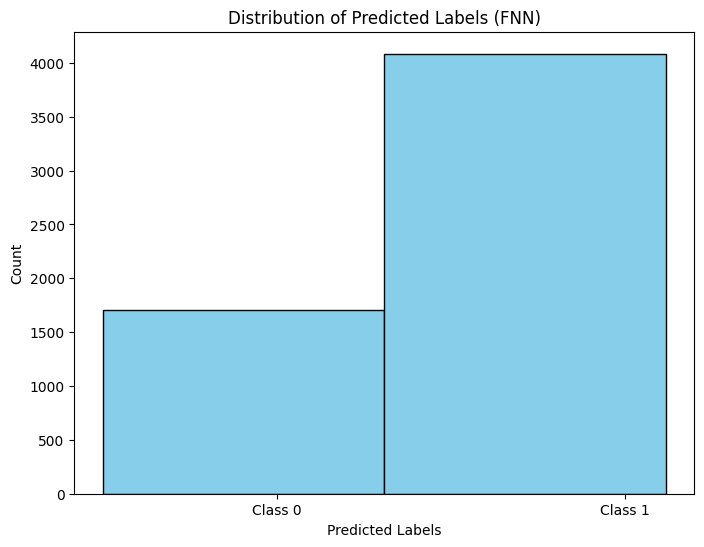

In [ ]:
## Applying the trained model to make predictions on the test dataset
y_pred_new = model.predict(test_selected)
# Visualizing the distribution of the predicted labels
plt.figure(figsize=(8, 6))
plt.hist(y_pred_new, bins=2, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Labels (FNN)')
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Class 0', 'Class 1'])
plt.show()

In [ ]:
### Checking the lengths of the test_ID and y_pred_new
print(len(test_ID))
print(len(y_pred_new))

5792
5792


In [ ]:
###Flatten y_pred_new
y_pred_new = y_pred_new.flatten()

In [ ]:
### putting my model into a submission.csv
submission_df = pd.DataFrame({'patient_id': test_ID, 'DiagPeriodL90D_pred': y_pred_new})
submission_df.to_csv('submission_fnn.csv', index=False)

I flatten the predicted labels and extracted the test_ID as a 1D array to prevent them from having incompatible shapes and that just makes combining them with easier

In [ ]:
sub_df = pd.read_csv('submission_fnn.csv')
sub_df.head(15)

patient_id  DiagPeriodL90D_pred
0       573710             0.574160
1       593679             0.446469
2       184532             0.543105
3       447383             0.587334
4       687972             0.585520
5       281312             0.040941
6       492714             0.591566
7       378266             0.667987
8       291550             0.480808
9       612272             0.556103
10      240105             0.776202
11      277939             0.024362
12      504153             0.025197
13      287269             0.567564
14      108727             0.643612